# Stellar Classification

Download dataset from kaggle https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

Load dataframe:

In [2]:
df = pd.read_csv("star_classification.csv")
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


Drop unused columns with ID

In [3]:
df.drop(["obj_ID","run_ID","rerun_ID","field_ID","spec_obj_ID","plate","MJD"],axis=1,inplace=True)
df.head()

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,GALAXY,0.634794,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,GALAXY,0.779136,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,GALAXY,0.644195,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,GALAXY,0.932346,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,GALAXY,0.116123,842


In [4]:
P = pd.get_dummies(df['class'])
df_corr = pd.concat([df, P], axis=1)
df_corr.head()

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,fiber_ID,GALAXY,QSO,STAR
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,GALAXY,0.634794,171,1,0,0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,GALAXY,0.779136,427,1,0,0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,GALAXY,0.644195,299,1,0,0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,GALAXY,0.932346,775,1,0,0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,GALAXY,0.116123,842,1,0,0


In [5]:
import seaborn as sns

<AxesSubplot:>

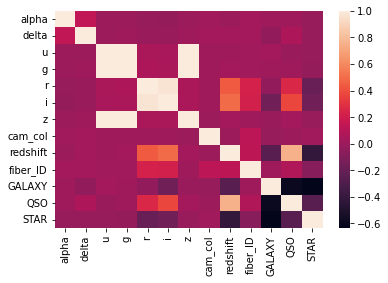

In [6]:
sns.heatmap(df_corr.corr())

In [7]:
y = df["class"]
X = df[["r","i","redshift"]]


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

## Logistic Regression
Logistic regression is a calculation used to predict a binary outcome: either something happens, or does not. This can be exhibited as Yes/No, Pass/Fail, Alive/Dead, etc. 

Independent variables are analyzed to determine the binary outcome with the results falling into one of two categories. The independent variables can be categorical or numeric, but the dependent variable is always categorical. 

In [10]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\monic\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
prediction = logmodel.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Confusion Matrix

In [13]:
cf_matrix = confusion_matrix(y_test,prediction)
cf_matrix

array([[11350,   208,   302],
       [  530,  3264,     3],
       [    0,    11,  4332]], dtype=int64)

<AxesSubplot:>

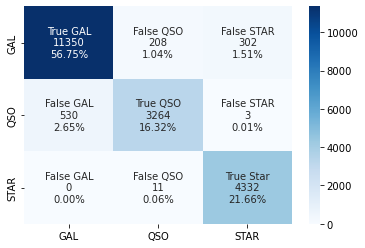

In [14]:
group_names = ['True GAL','False QSO','False STAR','False GAL','True QSO','False STAR','False GAL','False QSO','True Star']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=['GAL','QSO','STAR'], yticklabels=['GAL','QSO','STAR'])


In [15]:
print(classification_report(y_test,prediction))
acc_LogReg = accuracy_score(y_test,prediction)


              precision    recall  f1-score   support

      GALAXY       0.96      0.96      0.96     11860
         QSO       0.94      0.86      0.90      3797
        STAR       0.93      1.00      0.96      4343

    accuracy                           0.95     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.95      0.95      0.95     20000



## Decision Trees
A decision tree is a supervised learning algorithm that is perfect for classification problems, as it’s able to order classes on a precise level. It works like a flow chart, separating data points into two similar categories at a time from the “tree trunk” to “branches,” to “leaves,” where the categories become more finitely similar. This creates categories within categories, allowing for organic classification with limited human supervision.

Train and fit the model (criterion='gini' or 'entropy')

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 5, random_state = 101)
clf_gini.fit(X_train,y_train)
predictions_tree = clf_gini.predict(X_test)

Confusion matrix 

<AxesSubplot:>

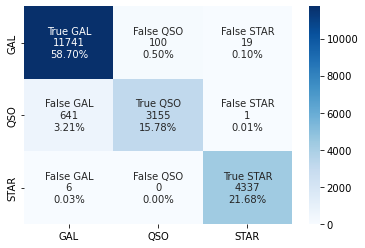

In [18]:
cf_matrix = confusion_matrix(y_test, predictions_tree)
group_names = ['True GAL','False QSO','False STAR','False GAL','True QSO','False STAR','False GAL','False QSO','True STAR']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=['GAL','QSO','STAR'], yticklabels=['GAL','QSO','STAR'])


Classification report

In [19]:
print(classification_report(y_test, predictions_tree))
acc_tree = accuracy_score(y_test, predictions_tree)

              precision    recall  f1-score   support

      GALAXY       0.95      0.99      0.97     11860
         QSO       0.97      0.83      0.89      3797
        STAR       1.00      1.00      1.00      4343

    accuracy                           0.96     20000
   macro avg       0.97      0.94      0.95     20000
weighted avg       0.96      0.96      0.96     20000



Visualize tree

[Text(394.58571428571423, 498.3, 'X[2] <= 0.004\ngini = 0.564\nsamples = 80000\nvalue = [47585, 15164, 17251]'),
 Text(151.45714285714286, 407.70000000000005, 'X[2] <= -0.0\ngini = 0.045\nsamples = 17662\nvalue = [409, 2, 17251]'),
 Text(47.82857142857142, 317.1, 'X[2] <= -0.004\ngini = 0.006\nsamples = 10934\nvalue = [34, 0, 10900]'),
 Text(31.885714285714283, 226.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(63.771428571428565, 226.5, 'X[1] <= 22.2\ngini = 0.005\nsamples = 10928\nvalue = [28, 0, 10900]'),
 Text(31.885714285714283, 135.89999999999998, 'X[2] <= -0.002\ngini = 0.004\nsamples = 10880\nvalue = [24, 0, 10856]'),
 Text(15.942857142857141, 45.299999999999955, 'gini = 0.062\nsamples = 62\nvalue = [2, 0, 60]'),
 Text(47.82857142857142, 45.299999999999955, 'gini = 0.004\nsamples = 10818\nvalue = [22, 0, 10796]'),
 Text(95.65714285714284, 135.89999999999998, 'X[2] <= -0.003\ngini = 0.153\nsamples = 48\nvalue = [4, 0, 44]'),
 Text(79.71428571428571, 45.299999999999955, 

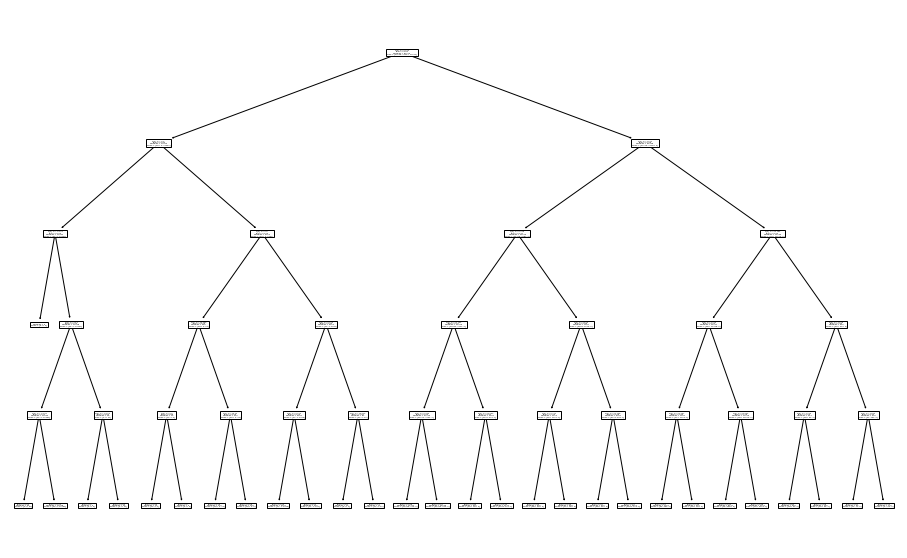

In [20]:
from sklearn import tree

plt.figure(figsize=(16,10))
tree.plot_tree(clf_gini.fit(X_train, y_train))

### Random Forest
The random forest algorithm is an expansion of decision tree, in that you first construct a multitude of decision trees with training data, then fit your new data within one of the trees as a “random forest.”

It, essentially, averages your data to connect it to the nearest tree on the data scale. Random forest models are helpful as they remedy for the decision tree’s problem of “forcing” data points within a category unnecessarily. 

In [21]:
from sklearn.ensemble import RandomForestClassifier

Fit Random Forest

In [22]:
rfc = RandomForestClassifier(criterion='gini', max_depth = 5, random_state = 101, n_estimators = 10)

Predict

In [23]:
rfc.fit(X_train, y_train)
predictions_forest = rfc.predict(X_test)

Confusion matrix

<AxesSubplot:>

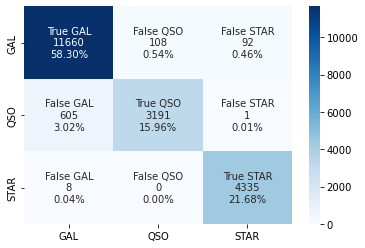

In [24]:
cf_matrix = confusion_matrix(y_test, predictions_forest)
group_names = ['True GAL','False QSO','False STAR','False GAL','True QSO','False STAR','False GAL','False QSO','True STAR']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=['GAL','QSO','STAR'], yticklabels=['GAL','QSO','STAR'])


Classification report

In [25]:
print(classification_report(y_test, predictions_forest))
acc_forest = accuracy_score(y_test, predictions_forest)

              precision    recall  f1-score   support

      GALAXY       0.95      0.98      0.97     11860
         QSO       0.97      0.84      0.90      3797
        STAR       0.98      1.00      0.99      4343

    accuracy                           0.96     20000
   macro avg       0.97      0.94      0.95     20000
weighted avg       0.96      0.96      0.96     20000



## KNN classification
K-nearest neighbors (k-NN) is a pattern recognition algorithm that uses training datasets to find the k closest relatives in future examples. 

When k-NN is used in classification, you calculate to place data within the category of its nearest neighbor. If k = 1, then it would be placed in the class nearest 1. K is classified by a plurality poll of its neighbors.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

Choosing the right number of neighbours

Text(0, 0.5, 'error')

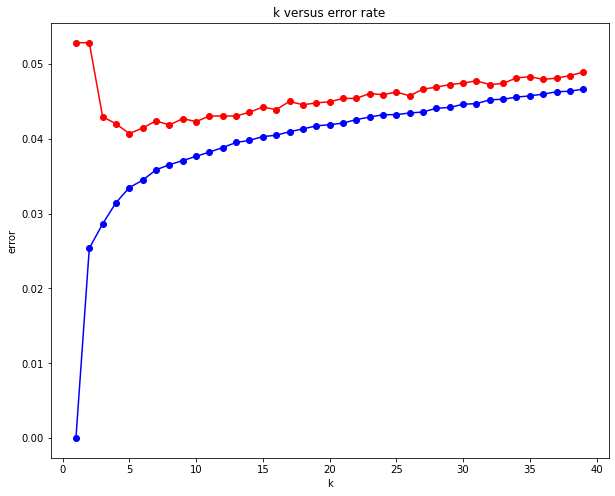

In [27]:
train_error = []
test_error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    prediction_tr = knn.predict(X_train)
    prediction_te = knn.predict(X_test)
    train_error.append(np.mean(prediction_tr != y_train))
    test_error.append(np.mean(prediction_te != y_test))

plt.figure(figsize = (10,8))
plt.plot(range(1,40), train_error, color = 'blue', marker = 'o')
plt.plot(range(1,40), test_error, color = 'red', marker = 'o')
plt.title('k versus error rate')
plt.xlabel('k')
plt.ylabel('error')

Fit and predict

In [28]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
prediction_KNN = knn.predict(X_test)

Evaluate model

<AxesSubplot:>

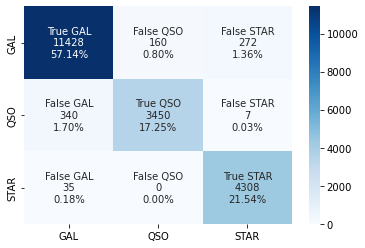

In [29]:
cf_matrix = confusion_matrix(y_test, prediction_KNN)
group_names = ['True GAL','False QSO','False STAR','False GAL','True QSO','False STAR','False GAL','False QSO','True STAR']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=['GAL','QSO','STAR'], yticklabels=['GAL','QSO','STAR'])


In [30]:
print(classification_report(y_test, prediction_KNN))
acc_KNN = accuracy_score(y_test, prediction_KNN)

              precision    recall  f1-score   support

      GALAXY       0.97      0.96      0.97     11860
         QSO       0.96      0.91      0.93      3797
        STAR       0.94      0.99      0.96      4343

    accuracy                           0.96     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.96      0.96      0.96     20000



## Comparing results

In [31]:
print("Accuracy of Logistic Regression: {:.4}%".format(acc_LogReg*100))
print("Accuracy of Decision Tree: {:.4}%".format(acc_tree*100))
print("Accuracy of Random Forest: {:.4}%".format(acc_forest*100))
print("Accuracy of KNN: {:.4}%".format(acc_KNN*100))

Accuracy of Logistic Regression: 94.73%
Accuracy of Decision Tree: 96.17%
Accuracy of Random Forest: 95.93%
Accuracy of KNN: 95.93%
